In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The embedded survey form must be entirely filled out and submitted on or before **11:59pm**.  Students must come to class the next day prepared to discuss the material covered in this assignment. 

---


# PCA 25: Parallel Python

### Goals for today's pre-class assignment 

1. [Matrix Multiply Example](#Matrix-Multiply-Example)
2. [Parallel Python example](#Parallel-Python-example)
3. [The Python GIL (Global Interface Lock)](#The-Python-GIL-(Global-Interface-Lock))
4. [Getting around the GIL](#Getting-around-the-GIL)
5. [Assignment wrap up](#Assignment-wrap-up)




---
<a name=Matrix-Multiply-Example></a>
# 1. Matrix Multiply Example



 The following is a simple implementation of a matrix multiply written in python. Review the code try to understand what it is doing.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sp
import random
import time
sp.init_printing(use_unicode=True)

In [3]:
#simple matrix multiply (no numpy)
def multiply(m1,m2):
    m = len(m1)
    d = len(m2)
    n = len(m2[0])
    if len(m1[0]) != d:
        print("ERROR - inner dimentions not equal")
    result = [[0 for i in range(m)] for j in range(n)]
    for i in range(0,m):
        for j in range(0,n):
            for k in range(0,d):
                result[i][j] = result[i][j] + m1[i][k] * m2[k][j]
    return result

In [5]:
# Random generated 2d lists of lists that can be multiplied 
m = 4
d = 10
n = 4

A = [[random.random() for i in range(d)] for j in range(m)]
B = [[random.random() for i in range(n)] for j in range(d)]

In [7]:
#Compute matrix multiply using your function
start = time.time()

simple_answer = multiply(A, B)
simple_time = time.time()-start

print('simple_answer =',simple_time,'seconds')

simple_answer = 0.00015401840209960938 seconds


Lets compare this to the numpy result:

In [10]:
#Compare to numpy result
start = time.time()

np_answer = np.matrix(A)*np.matrix(B)
np_time = time.time()-start

print('np_answer =',np_time,'seconds')


np_answer = 0.0006556510925292969 seconds


For this example, numpy result are most likely slower than the simple result.  Think about why this might be.  We will discuss this later. 

&#9989; **<font color=red>DO THIS:</font>**  See if you can write a loop to do a scaling study for the above code.  Loop over the value of $n$ such that $n$ is 4, 16, 32, 64, 128 and 256.  For each iteration generate two random matrices (as above) with $m = d = n$. Then time the matrix multiply for the provided function and again for the numpy function. Graph the results as size of $n$ vs time.  

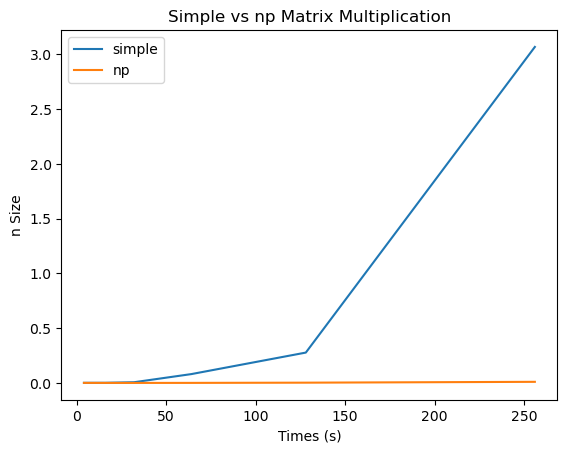

In [39]:
# Put your code here
n_vals = [4,16,32,64,128,256]
simple_times = []
np_times = []

for n in n_vals:
    m = n
    d = n
    
    A = [[random.random() for i in range(d)] for j in range(m)]
    B = [[random.random() for i in range(n)] for j in range(d)]
    
    start = time.time()
    
    simple_answer = multiply(A, B)
    simple_time = time.time()-start
    
    simple_times.append(simple_time)
    
    start = time.time()
    
    np_answer = np.matrix(A)*np.matrix(B)
    np_time = time.time()-start
    
    np_times.append(np_time)
    
plt.plot(n_vals, simple_times, label='simple')
plt.plot(n_vals, np_times, label='np')
plt.title('Simple vs np Matrix Multiplication')
plt.xlabel('Times (s)')
plt.ylabel('n Size')
plt.legend()
plt.show()

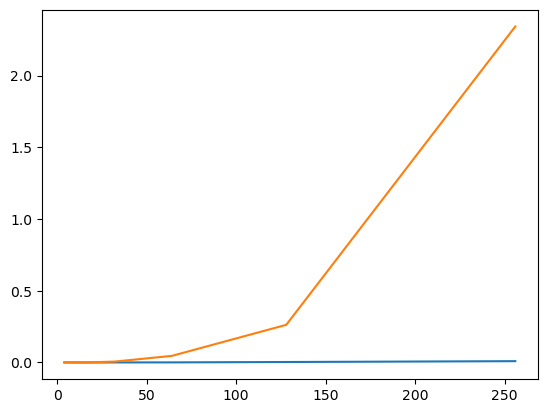

In [37]:
##ANSWER##
simple_time = []
np_time = []
n_vals = [4,16,32,64,128, 256]
for n in n_vals:
    
    m = n
    d = n

    A = [[random.random() for i in range(d)] for j in range(m)]
    B = [[random.random() for i in range(n)] for j in range(d)]
    
    start = time.time()

    simple_answer = multiply(A, B)
    simple_time.append(time.time()-start)

    start = time.time()

    np_answer = np.matrix(A)*np.matrix(B)
    np_time.append(time.time()-start)

plt.plot(n_vals,np_time)
plt.plot(n_vals,simple_time)
plt.show()
##ANSWER##

&#9989; **<font color=red>DO THIS:</font>**  Explore the Internet for ways to speed up Python (There are a lot of them).  Save some of your search results in the cell below and come to class prepaired to discuss what you found.

- Avoid using global variables
- Avoid using recursion
- Use xrange instead of range for loop iterations



---
<a name=Parallel-Python-example></a>
# 2. Parallel Python example



Here is an example for running parallel python using the ```multiprocessing``` library. Note, that running multiprocessing in Python doesn't generally work well from a Jupyter notebook, so you should copy the Python code into a .py file and run it directly from the command line if you encounter errors. 

https://stackoverflow.com/questions/10415028/how-can-i-recover-the-return-value-of-a-function-passed-to-multiprocessing-proce


In [58]:
import multiprocessing
num_procs = multiprocessing.cpu_count()
print('You have', num_procs, 'processors')

def worker(procnum, return_dict):
    '''worker function'''
    print(str(procnum) + ' represent!')
    return_dict[procnum] = procnum


if __name__ == '__main__':
    manager = multiprocessing.Manager()
    return_dict = manager.dict()
    jobs = []
    for i in range(num_procs):
        p = multiprocessing.Process(target=worker, args=(i,return_dict))
        jobs.append(p)
        p.start()

    for proc in jobs:
        proc.join()
    print(return_dict.values())

You have 4 processors
[]


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'worker' on <module '__main__' (<class '_frozen_importlib.BuiltinImporter'>)>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'wor

### Lets try to make a parallel matrix multiply

The following is the instructor's attempt at using multiprocessing to do matrix multiply. First lets start with a serial method.

In [42]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sp
import random
import time
sp.init_printing(use_unicode=True)

In [44]:
#simple matrix multiply (no numpy)
def multiply(m1,m2):
    m = len(m1)
    d = len(m2)
    n = len(m2[0])
    if len(m1[0]) != d:
        print("ERROR - inner dimentions not equal")
    result = [[0 for i in range(m)] for j in range(n)]
    for i in range(0,m):
        for j in range(0,n):
            for k in range(0,d):
                result[i][j] = result[i][j] + m1[i][k] * m2[k][j]
    return result

In [46]:
# Random generated 2d lists of lists that can be multiplied 
m = 4
d = 10
n = 4

A = [[random.random() for i in range(d)] for j in range(m)]
B = [[random.random() for i in range(n)] for j in range(d)]

In [47]:
#Compute matrix multiply using your function


start = time.time()

simple_answer = multiply(A, B)
simple_time = time.time()-start

print('simple_answer =',simple_time,'seconds')

simple_answer = 0.0018088817596435547 seconds


Lets compare this to the numpy result:

In [60]:
#Compare to numpy result
start = time.time()

np_answer = np.matrix(A)*np.matrix(B)
np_time = time.time()-start

print('np_answer =',np_time,'seconds')


np_answer = 0.0006306171417236328 seconds


In [62]:
#Compare to numpy result
A_ = np.matrix(A)
B_ = np.matrix(B)

start = time.time()

np_answer = A_*B_
np_time = time.time()-start

print('np_answer =',np_time,'seconds')

np_answer = 0.0010981559753417969 seconds


In [64]:
np.allclose(simple_answer,np_answer)

True

### Now lets use multiprocessing to try and do a parallel method

In [ ]:
#Attempt at a parallel multiply
import matplotlib.pylab as plt
import numpy as np
import sympy as sp
import random
import time
import multiprocessing
num_procs = multiprocessing.cpu_count()
sp.init_printing(use_unicode=True)
m = 4
d = 10
n = 4

A = [[random.random() for i in range(d)] for j in range(m)]
B = [[random.random() for i in range(n)] for j in range(d)]

def multiply(m1,m2):
    m = len(m1)
    d = len(m2)
    n = len(m2[0])
    if len(m1[0]) != d:
        print("ERROR - inner dimentions not equal")
    result = [[0 for i in range(m)] for j in range(n)]
    for i in range(0,m):
        for j in range(0,n):
            for k in range(0,d):
                result[i][j] = result[i][j] + m1[i][k] * m2[k][j]
    return result


def compute_element(args):
    i, j, m1, m2 = args
    return i, j, sum(m1[i][k] * m2[k][j] for k in range(len(m2)))

def parallel_multiply(m1, m2):
    m, d, n = len(m1), len(m2), len(m2[0])
    
    if len(m1[0]) != d:
        raise ValueError("ERROR - inner dimensions not equal")
    
    result = [[0] * n for _ in range(m)]
    
    with multiprocessing.Pool() as pool:
        indices = [(i, j, m1, m2) for i in range(m) for j in range(n)]
        for i, j, value in pool.map(compute_element, indices):
            result[i][j] = value
    
    return result
if __name__ == "__main__":
    

    #Parallel result
    start = time.time()

    parallel_answer = parallel_multiply(A, B)
    parallel_time = time.time()-start


    #Serial Result
    start = time.time()
    serial_answer = multiply(A,B)
    serial_time = time.time()-start
    
    #Numpy result
    A_ = np.matrix(A)
    B_ = np.matrix(B)

    start = time.time()

    np_answer = A_*B_
    np_time = time.time()-start

    print('np_answer =',np_time,'seconds')
    print('parallel_answer=',parallel_time,'seconds')
    print('serial_answer=',serial_time,'seconds')


    print("\n_______\nParallel\n")
    for row in parallel_answer:
        print(row)

    print("\n________\nSerial\n")
    for row in serial_answer:
        print(row)

    print("\n________\nNumpy\n")
    for row in np_answer:
        print(row)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
parallel_time = 0.3078908920288086
serial_time = 3.266334533691406e-05
np_time = 0.09276270866394043
objects = ('Simple', 'Numpy', 'parallel')
y_pos = np.arange(len(objects))
performance = [simple_time,np_time,parallel_time]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time (seconds)')
plt.yscale('log')
plt.title('Programming language usage')
 

&#9989; **<font color=red>QUESTION:</font>** Why do you think the parallel version was so much slower than Python?

Because the modules use a lot of memory, so it slows the code down significantly.



---
<a name=The-Python-GIL-(Global-Interface-Lock)></a>
# 3. The Python GIL (Global Interface Lock)



&#9989; **<font color=red>DO THIS:</font>** Read the following blog post and answer the questions: https://wiki.python.org/moin/GlobalInterpreterLock

&#9989; **<font color=red>QUESTION:</font>**  Why was the GIL introduced to the Python programming language?

To prevent race conditions and ensure thread safety.

&#9989; **<font color=red>QUESTION:</font>**  How does the GIL help avoid race conditions?

It makes sure there is, at any time, only one thread running.

&#9989; **<font color=red>QUESTION:</font>**  How does the GIL help avoid deadlock?

Having only one thread running at a time allows for implicit safety against concurrent access.

&#9989; **<font color=red>QUESTION:</font>**  Why is the GIL problematic to parallel libraries like the "thread" and "multiprocessing" libraries?

Because it only allows for one thread to run at a time, thus blocking parallel libraries from using them for parallelization.



---
<a name=Getting-around-the-GIL></a>
# 4. Getting around the GIL


Fortunately there are ways to get around the GIL. In fact, Python has libraries that do shared memory parallelization, shared network parallelization and GPU acceleration.  Do some research and answer the following questions:


&#9989; **<font color=red>QUESTION:</font>**  Some of ```numpy``` library can run in parallel. How does ```numpy``` get around the GIL? 

While numpy is doing an array operation, python releases the GIL.

&#9989; **<font color=red>QUESTION:</font>**  The  ```numba``` library can also run in parallel. How does ```numba``` get around the GIL? 

Whenever Numba optimizes Python code to native code that only works on native types and variables (rather than Python objects), it is not necessary anymore to hold Python’s global interpreter lock (GIL). Numba will release the GIL when entering such a compiled function if you passed nogil=True.

&#9989; **<font color=red>QUESTION:</font>** What python library can be used to program GPUs?

CuPy

&#9989; **<font color=red>QUESTION:</font>** What python library can be used to run shared network parallelization such as the Message Passing Interface (MPI)?

multiprocessing.shared_memory

&#9989; **<font color=red>QUESTION:</font>** There seem to be a lot of solutions for running Python in parallel.  Provide an argument(s) as to why you would bother with an "older" language such as C/C++ or Fortran? 

In order to avoid workarounds to GIL

----

<a name="Assignment_wrap-up"></a>
# 5. Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credits for the assignment!**

[Direct Link to Survey Form](https://cmse.msu.edu/cmse401-pc-survey)


Put your answer to the above question here

&#9989; **<font color=red>QUESTION:</font>**  Summarize what you did in this assignment.

Leanred about Python parallelization and GIL

&#9989; **<font color=red>QUESTION:</font>**  What questions do you have, if any, about any of the topics discussed in this assignment after working through the jupyter notebook?

None

&#9989; **<font color=red>QUESTION:</font>**  How well do you feel this assignment helped you to achieve a better understanding of the above mentioned topic(s)?

Good

&#9989; **<font color=red>QUESTION:</font>** What was the **most** challenging part of this assignment for you? 

Searching for libraries

&#9989; **<font color=red>QUESTION:</font>** What was the **least** challenging part of this assignment for you? 

Running the parallel code

&#9989; **<font color=red>QUESTION:</font>**  What kind of additional questions or support, if any, do you feel you need to have a better understanding of the content in this assignment?

None

&#9989; **<font color=red>QUESTION:</font>**  Do you have any further questions or comments about this material, or anything else that's going on in class?

No

&#9989; **<font color=red>QUESTION:</font>** Approximately how long did this pre-class assignment take?

30 min

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse401-pc-survey" 
	width="100%" 
	height="500px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)



---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit the above survey from on or before the assignment due date.

Written by Dr. Dirk Colbry, Michigan State University (Updated by Dr. Nathan Haut in Spring 2025)
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----

----